## Calcolo Mediana diametro delle rocce (MDR), distanza interquartile della mediana delle rocce (IQR), trasformazione della variabile dell’esposizione, boxplot outliers ed analisi collinearità

### Claudia Gabriela Ochoa Martinez (2020)

##### Carichiamo i dati relativo alle covariate delle trappole.

In [1]:
siteCovs <- read.csv("Dati-elaborati/Dati-cov.csv", dec=",", sep=";", header = TRUE, stringsAsFactors = FALSE)

##### Creiamo un subset contenente solo il diametro delle rocce per calcolare MDR e IQR. Trasformiamo la variabile esposizione,  dato che si tratta di una variabile circolare. Si rende pertanto necessario trasformarla prima delle analisi statistiche, in modo da facilitare l’interpretazione ecologica del dato; tramite la trasformazione, i valori intorno allo 0 indicano le esposizioni nord, i valori positivi indicano esposizione nord-est, mentre quelli negativi indicano esposizione nord-ovest. 

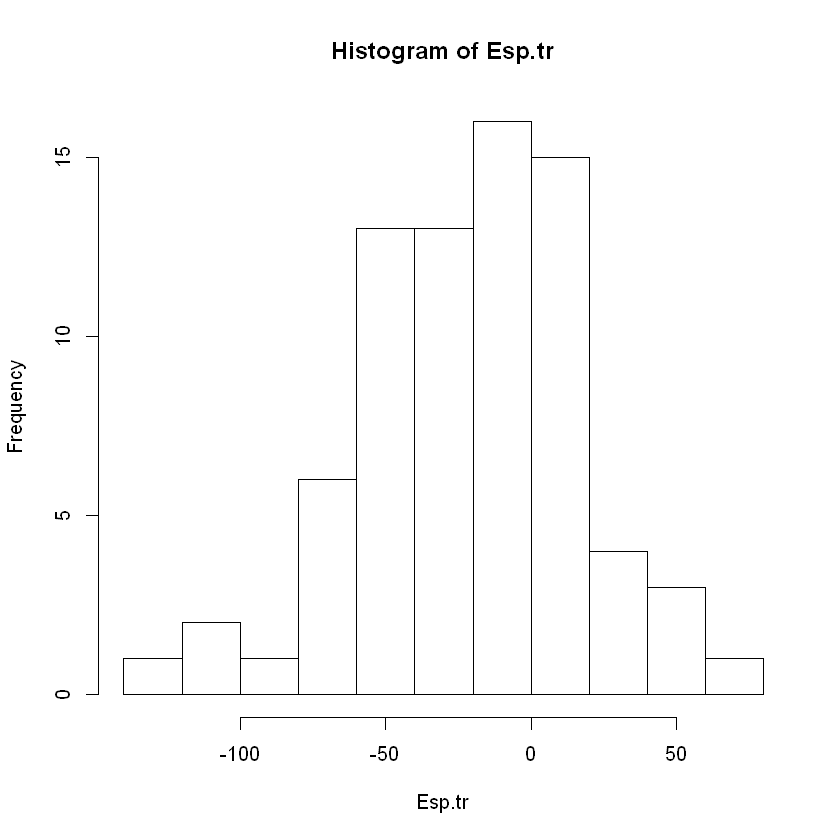

In [2]:
diametro_rocce <- subset(siteCovs,select=c("Diametro.roccia.1..cm.","Diametro.roccia.2..cm.","Diametro.roccia.3..cm."))
MDR <- apply(diametro_rocce, 1, median)
IQR <- apply(diametro_rocce, 1, IQR)
# trasformo i dati dell'esposizione
# trasformazione e successiva analisi dei dati di esposizione
Esp.tr <- vector("numeric", length(siteCovs$aspect_deg))
for (i in 1:length(siteCovs$aspect_deg)) {
  if (siteCovs$aspect_deg[i] > 180) Esp.tr[i] <- siteCovs$aspect_deg[i]-360 else Esp.tr[i] <- siteCovs$aspect_deg[i]
}
hist(Esp.tr)

##### Uniamo tutte le covariate in un unico dataframe

In [3]:
siteCovs <- cbind(siteCovs, MDR, IQR, Esp.tr)
head(siteCovs)

,Diametro.roccia.1..cm.,Diametro.roccia.2..cm.,Diametro.roccia.3..cm.,alt_m,aspect_deg,slope_degr,n_species,dominant,Cop_Veg_2018_ottavi,Cop_Veg_2015_ottavi,MDR,IQR,Esp.tr
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,59,96,102,2782.206,234,13,23,Graminacee,5,3.6,96,21.5,-126
2,176,42,76,2781.136,294,16,16,Graminacee,2,2.8,76,67.0,-66
3,51,88,62,2781.067,310,0,13,Graminacee,2,2.0,62,18.5,-50
4,99,30,36,2781.087,293,8,23,Graminacee,5,4.0,36,34.5,-67
5,164,41,47,2781.887,294,11,21,Graminacee,2,2.0,47,61.5,-66
6,130,31,36,2782.237,310,7,20,Graminacee,4,4.4,36,49.5,-50


In [4]:
##### Salviamo il nuovo dataframe
write.csv2(siteCovs,"Dati-preparazione-modello/Dati-cov-mdr-iqr.csv", row.names = FALSE)

#### Si procede all'outlier detection 

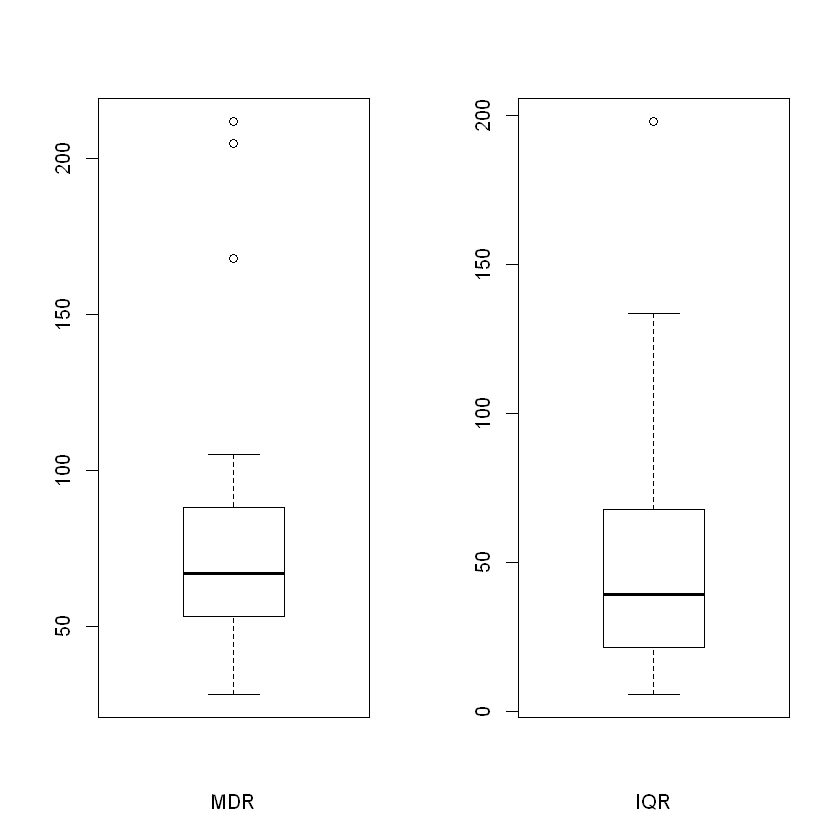

In [6]:
### MDR & IQR
par(mfrow = c(1, 2))
boxplot(siteCovs$MDR, xlab="MDR")
boxplot(siteCovs$IQR, xlab="IQR")


##### Si notano degli outlier in MDR e IQR,  questi valori però rappresentano dati ambientali reali e non frutto di errori di rilevamento. Potrebbero essere utili per meglio caratterizzare le preferenze ambientali della specie

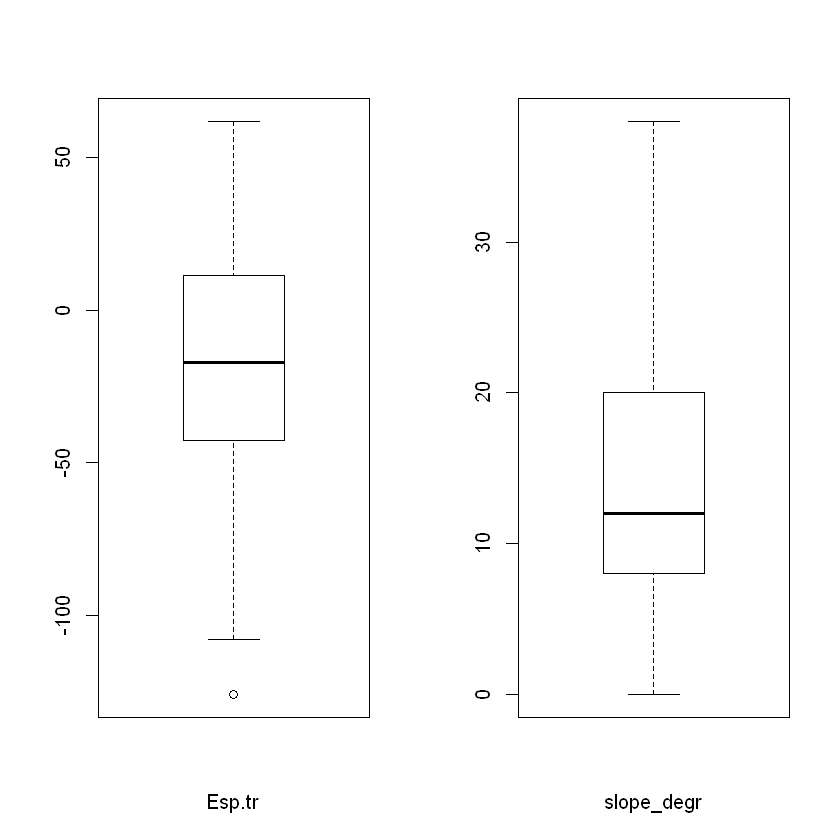

In [7]:
### Esposizione ed inclinazione
par(mfrow = c(1, 2))
boxplot(siteCovs$Esp.tr, xlab="Esp.tr")
boxplot(siteCovs$slope_degr, xlab="slope_degr")


##### L’esposizione, in quanto variabile circolare, è stata trasformata prima delle analisi statistiche, in modo da facilitare l’interpretazione ecologica del dato; tramite la trasformazione, i valori intorno allo 0 indicano le esposizioni nord, i valori positivi indicano esposizione nord-est, mentre quelli negativi indicano esposizione nord-ovest. 

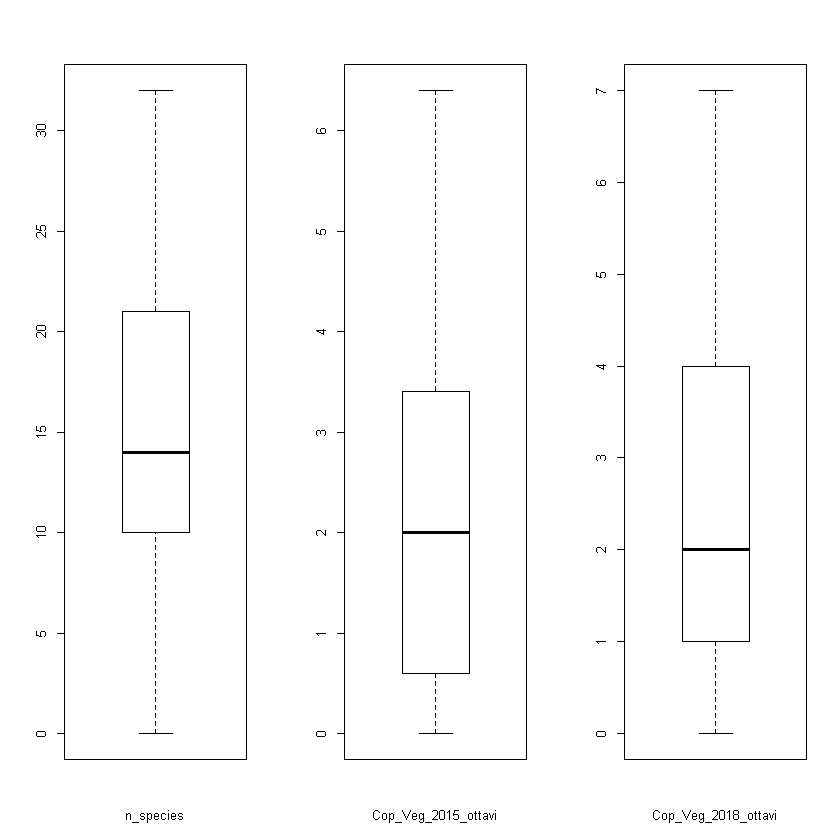

In [12]:
### numero di specie vegetali e copertura vegetazionale 
par(mfrow = c(1, 3))
boxplot(siteCovs$n_species, xlab="n_species")
boxplot(siteCovs$Cop_Veg_2015_ottavi, xlab="Cop_Veg_2015_ottavi")
boxplot(siteCovs$Cop_Veg_2018_ottavi, xlab="Cop_Veg_2018_ottavi")


#### Si procede all'analisi di collinearità tra le variabili

,slope_degr,n_species,MDR,IQR,Esp.tr,Cop_Veg_2015_ottavi,Cop_Veg_2018_ottavi,alt_m
slope_degr,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
n_species,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
MDR,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
IQR,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
Esp.tr,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
Cop_Veg_2015_ottavi,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
Cop_Veg_2018_ottavi,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
alt_m,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


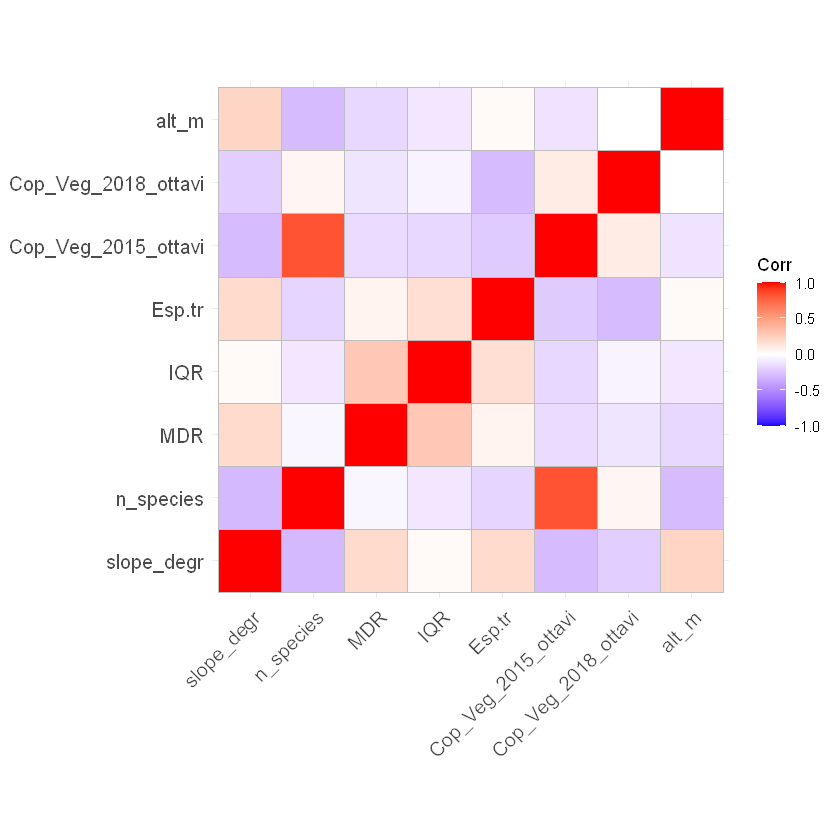

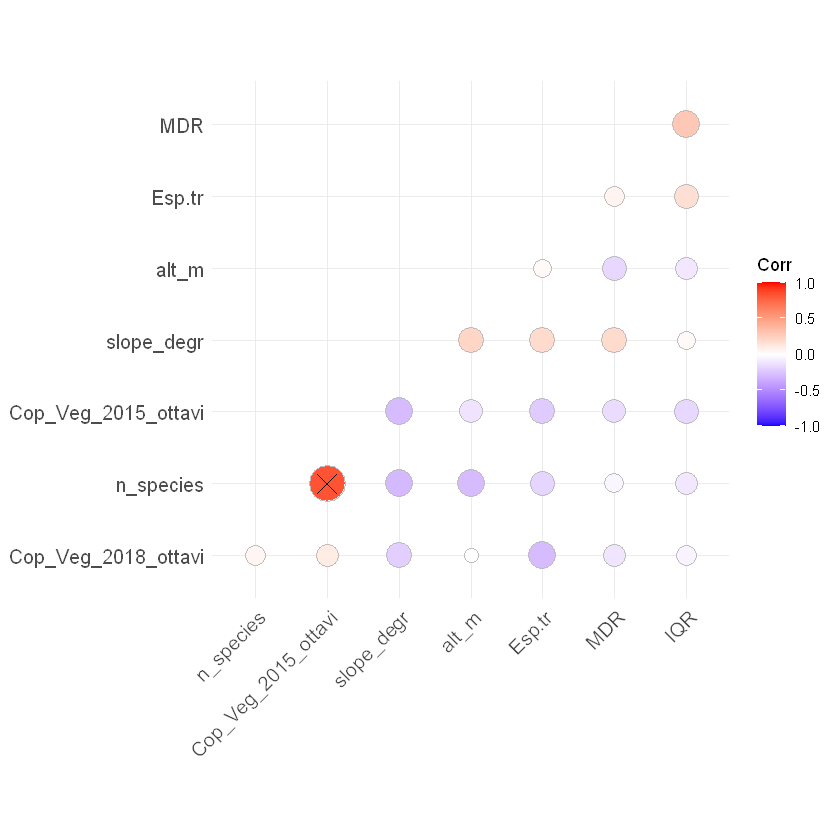

In [13]:
# collinearità
library(ggcorrplot)
cor.matrix <- cor(na.omit(siteCovs[,c("slope_degr","n_species","MDR","IQR","Esp.tr","Cop_Veg_2015_ottavi","Cop_Veg_2018_ottavi","alt_m")]))
ggcorrplot(cor.matrix)
p.mat <- (cor.matrix > 0.7)
p.mat
ggcorrplot(cor.matrix,
           hc.order = TRUE, method = "circle",
           type = "lower", p.mat = p.mat
)

#### Si nota l’alta collinearità tra le variabili della copertura vegetazionale (“Cop_Veg_2018_ottavi”) e del numero di specie (“n_species”)